<a href="https://colab.research.google.com/github/marceloasc/Grafos/blob/main/MenorCaminho(Dijkstra).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

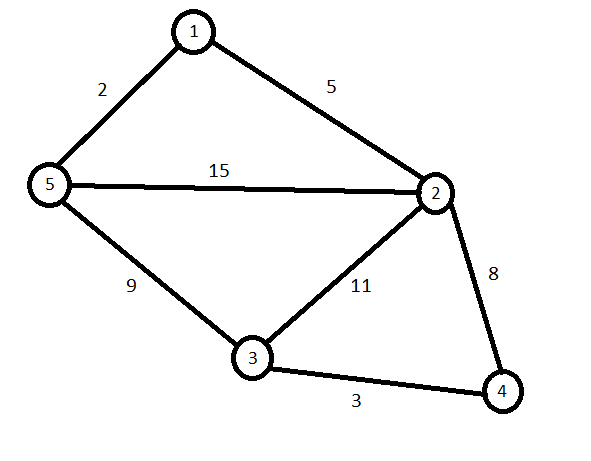

In [ ]:
import networkx as nx 
import matplotlib.pyplot as plt
from tabulate import tabulate

G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,2),(2,3),(3,4),(4,2),(3,5),(5,1),(5,2)])

G[1][2]['peso'] = 5
G[2][3]['peso'] = 11
G[3][4]['peso'] = 3
G[2][4]['peso'] = 8
G[5][2]['peso'] = 15
G[1][5]['peso'] = 2
G[5][3]['peso'] = 9

vertices = list(G.nodes)
tabela = []

for i in range(0, len(vertices)):
  tabela.append([])

for l in range(0, len(tabela)):
  tabela[l].append(vertices[l])


def Menor_Caminho(grafo, vertices, tabela, verticeInicio):
  linhatX = 1

  for q in tabela:
    if verticeInicio in q:
      q.append("X")
      q.append(0)
      q.append(" - ")
  
  for w in tabela:
    if w[0] != verticeInicio:
      w.append(' ')

  for e in tabela:
    if e[0] in list(nx.neighbors(grafo, verticeInicio)):
      e.append(grafo[verticeInicio][e[0]]['peso'])
      e.append(verticeInicio)

  while linhatX < len(tabela):

    Tamanhos = []
    for r in range(0, len(tabela)):
      if len(tabela[r]) == 4 and tabela[r][1] != "X":
        Tamanhos.append(tabela[r][2])
        
    menorCaminho = min(Tamanhos)

    for t in range(0, len(tabela)):
      if len(tabela[t]) == 4 and tabela[t][2] == menorCaminho:
        tabela[t][1] = "X"
        linhatX += 1
        no = tabela[t][0]
        proximos = list(nx.neighbors(grafo, no))

    for w in tabela:
      if len(w) != 4:
        w.append(100000000)
        w.append(" ")

    for y in tabela:
      if y[0] in proximos and y[1] != "X":      
        if y[2] > menorCaminho + grafo[no][y[0]]['peso']:
          y[2] = menorCaminho + grafo[no][y[0]]['peso']
          y[3] = no


  print(tabulate(tabela, headers=["Vertices", "S", "Tamanho", "Caminho"], tablefmt='orgtbl', stralign="center", numalign="center"))



Menor_Caminho(G, vertices, tabela, 1)